<a href="https://colab.research.google.com/github/sanazy/Plate-Detection-Project/blob/master/01_traffic_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get Data Ready

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Unzip data to traffic directory
!unzip "drive/My Drive/HoodDetectionData.zip" -d "drive/My Drive/Traffic/" -q

In [ ]:
# Define Resources
import pandas as pd
import numpy as np
import os
import random
!pip install swifter
import swifter
from textwrap import wrap
from PIL import Image, ImageDraw
from ast import literal_eval
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import cv2
import shutil 

%matplotlib inline

     |████████████████████████████████| 450kB 3.9MB/s 
     |████████████████████████████████| 645kB 8.8MB/s 
     |████████████████████████████████| 102kB 6.3MB/s 
  Created wheel for psutil: filename=psutil-5.7.0-cp36-cp36m-linux_x86_64.whl size=272672 sha256=0ab71b6f23584b18605b681f7c41fafcad7a480f8738537135993bc7267a92e2
  Stored in directory: /root/.cache/pip/wheels/d7/69/b4/3200b95828d1f0ddb3cb5699083717f4fdbd9b4223d0644c57
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=afaf2282de475de18cce91f0296f6461f2ccd43c4b48edb7eebb3528e39d3c89
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4040 sha256=8a7a91effb93e46273250a31a10360f46e1a2c0044eb203b30ba1724e4de2e3b
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
Successfully built psutil contextvars locket

In [ ]:
# Define Paths
root_path = "/content/drive/My Drive/Traffic/"
data_path = os.path.join(root_path, "images/")
train_path = os.path.join(root_path, "train/")
test_path = os.path.join(root_path, "test/")
csv_path = os.path.join(root_path, "labels.csv")

In [ ]:
# Read CSV File
df = pd.read_csv(csv_path)
df.head()

filename  width  ...  xmax ymax
0   2020-02-28_18-00-41_422444266_0_2_2_L2_I.jpg    884  ...   568  390
1  2020-02-29_13-00-44_262446810_42_2_2_L2_I.jpg    884  ...   517  402
2  2020-03-01_13-08-45_952919172_59_2_2_L2_I.jpg    884  ...   526  351
3   2020-03-01_15-46-30_722493391_0_2_2_L2_I.jpg    884  ...   549  397
4  2020-03-02_09-20-44_652156733_52_2_2_L2_I.jpg    884  ...   541  276

[5 rows x 8 columns]

***
## Data Analysis

In [ ]:
df.describe()

width       height  ...         xmax         ymax
count  7605.000000  7605.000000  ...  7605.000000  7605.000000
mean    440.211440   275.132939  ...   311.899277   162.199080
std     109.045987    68.156956  ...   129.865895    73.521816
min     360.000000   225.000000  ...    11.000000     7.000000
25%     360.000000   225.000000  ...   209.000000   112.000000
50%     360.000000   225.000000  ...   293.000000   146.000000
75%     576.000000   360.000000  ...   417.000000   200.000000
max     884.000000   553.000000  ...   600.000000   445.000000

[8 rows x 6 columns]

In [ ]:
df.info('include=all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7605 entries, 0 to 7604
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  7605 non-null   object
 1   width     7605 non-null   int64 
 2   height    7605 non-null   int64 
 3   class     7605 non-null   object
 4   xmin      7605 non-null   int64 
 5   ymin      7605 non-null   int64 
 6   xmax      7605 non-null   int64 
 7   ymax      7605 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 475.4+ KB


In [ ]:
print('Number of Image Labels:', df.shape[0])

unique_images = df['filename'].unique()
print('Unique Image Labels:', unique_images.shape[0])

num_total = len(os.listdir(data_path))
print('Number of Images:', num_total)

Number of Image Labels: 7605
Unique Image Labels: 7113
Number of Images: 6213


In [ ]:
# Seperate data with and without annotations
images = os.listdir(data_path)
for image in images:
  print(image)
  if (df['filename'] == image).any():
    shutil.copy(data_path + image, train_path)
  else:
    shutil.copy(data_path + image, test_path)

Streaming output truncated to the last 5000 lines.
2020-04-27_01-29-16_921563891_88_1_1_L1_I.jpg
2020-04-27_05-41-01_212764922_80_2_1_L2_I.jpg
2020-04-27_03-03-05_572455722_68_3_1_L3_I.jpg
2020-04-27_01-07-31_491514422_0_2_1_L2_I.jpg
2020-04-27_03-11-11_613219721_88_2_1_L2_I.jpg
2020-04-27_05-44-16_933215766_0_3_1_L3_I.jpg
2020-04-27_00-07-30_451956366_72_2_1_L2_I.jpg
2020-04-27_01-36-04_582127727_72_2_1_L2_I.jpg
2020-04-27_05-31-34_281053933_0_3_1_L3_I.jpg
2020-04-27_06-57-48_562422579_81_2_1_L2_I.jpg
2020-04-27_02-55-54_860283220_0_2_1_L2_I.jpg
2020-04-27_01-37-16_452143991_82_2_1_L2_I.jpg
2020-04-27_01-43-40_543044768_0_2_1_L2_I.jpg
2020-04-27_02-24-10_981991315_76_2_1_L2_I.jpg
2020-04-27_02-57-44_882715768_0_2_1_L2_I.jpg
2020-04-27_05-55-17_322881877_102_1_1_L1_I.jpg
2020-04-27_06-25-03_582146322_0_3_2_L3_I.jpg
2020-04-27_00-12-26_930499622_78_2_1_L2_I.jpg
2020-04-27_01-09-28_830232988_0_2_1_L2_I.jpg
2020-04-27_00-10-12_722959138_87_2_1_L2_I.jpg
2020-04-27_02-11-08_232918525_105_2_

In [ ]:
# Remove rows in df with no corresponding image
images = os.listdir(train_path)

for index, row in df.iterrows():
  name = row['filename']
  if not any(name in image for image in images):
    df.drop(index, axis=0, inplace=True)

***
## Data Visualization

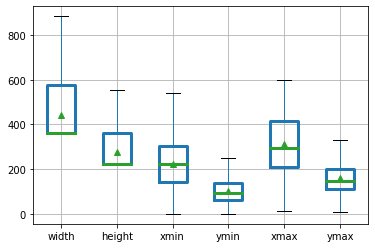

In [ ]:
# Boxplots of all numerical columns
boxprops = dict(linestyle='-', linewidth=3, color='k')
medianprops = dict(linestyle='-', linewidth=3, color='k')
df.boxplot(showfliers=False, showmeans=True, boxprops=boxprops, medianprops=medianprops)

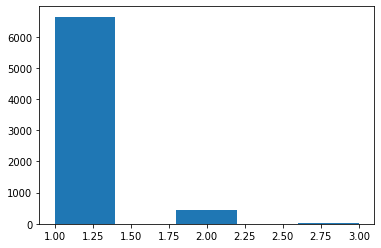

In [ ]:
# Histogram of filename count number
plt.hist(df['filename'].value_counts(), bins=5)
plt.show()

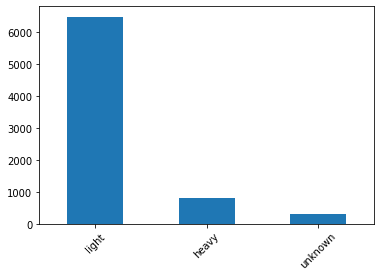

In [ ]:
df['class'].value_counts().plot(kind='bar', rot=45)

***
## Feature Engineering

In [ ]:
# Add a column including list of xmin, ymin, xmax, ymax
df['bbox'] = df[['xmin', 'ymin', 'xmax', 'ymax']].values.tolist()
df.head()

filename  ...                 bbox
1240  2020-03-22_20-39-20_482932499_75_2_2_L2_I.jpg  ...  [224, 70, 292, 111]
1241  2020-03-22_21-21-31_340646810_44_2_2_L2_I.jpg  ...  [274, 45, 340, 131]
1242  2020-03-22_21-26-08_473024611_41_2_2_L2_I.jpg  ...  [233, 67, 314, 105]
1243   2020-03-22_21-42-43_780299611_0_2_2_L2_I.jpg  ...   [197, 43, 253, 77]
1244  2020-03-22_21-50-21_753269538_52_2_2_L2_I.jpg  ...  [253, 98, 326, 137]

[5 rows x 9 columns]

In [ ]:
# Adding a column for area of bboxes
df['bbox_area'] = (df.xmax - df.xmin) * (df.ymax - df.ymin)
df.head()

filename  ...  bbox_area
0   2020-02-28_18-00-41_422444266_0_2_2_L2_I.jpg  ...      79112
1  2020-02-29_13-00-44_262446810_42_2_2_L2_I.jpg  ...      41144
2  2020-03-01_13-08-45_952919172_59_2_2_L2_I.jpg  ...      43350
3   2020-03-01_15-46-30_722493391_0_2_2_L2_I.jpg  ...      77982
4  2020-03-02_09-20-44_652156733_52_2_2_L2_I.jpg  ...      58656

[5 rows x 10 columns]

***
## Visualize Differnet Car Images

In [ ]:
def show_images(image_ids, text=[]):
  fig = plt.figure(figsize=(20, 20))
  rows, columns = 5, 4
  ax = []

  for i, image_id in enumerate(image_ids):
    # read images
    image_path = os.path.join(train_path, image_id)
    image = Image.open(image_path)

    # get all bboxes for given image in [xmin, ymin, width, height]
    bboxes = [box for box in df[df['filename'] == image_id]['bbox']]

    # draw bbox as rectangle
    draw = ImageDraw.Draw(image)
    for bbox in bboxes:    
      draw.rectangle([bbox[0], bbox[1], bbox[2], bbox[3]], width=2, outline=(255,0,0))

    # add image to subplot
    ax.append(fig.add_subplot(rows, columns, i+1))
    ax[-1].set_title("\n".join(wrap(image_id, 30)))
    if text:
      ax[-1].text(0.5, 0.7, text[i], size=20, rotation=30., ha="center", va="center", 
                  bbox=dict(boxstyle="round", ec=(1., 0.5, 0.5), fc=(1., 0.8, 0.8)))
    plt.axis('off')
    plt.imshow(image)
  
  fig.tight_layout()
  plt.show()

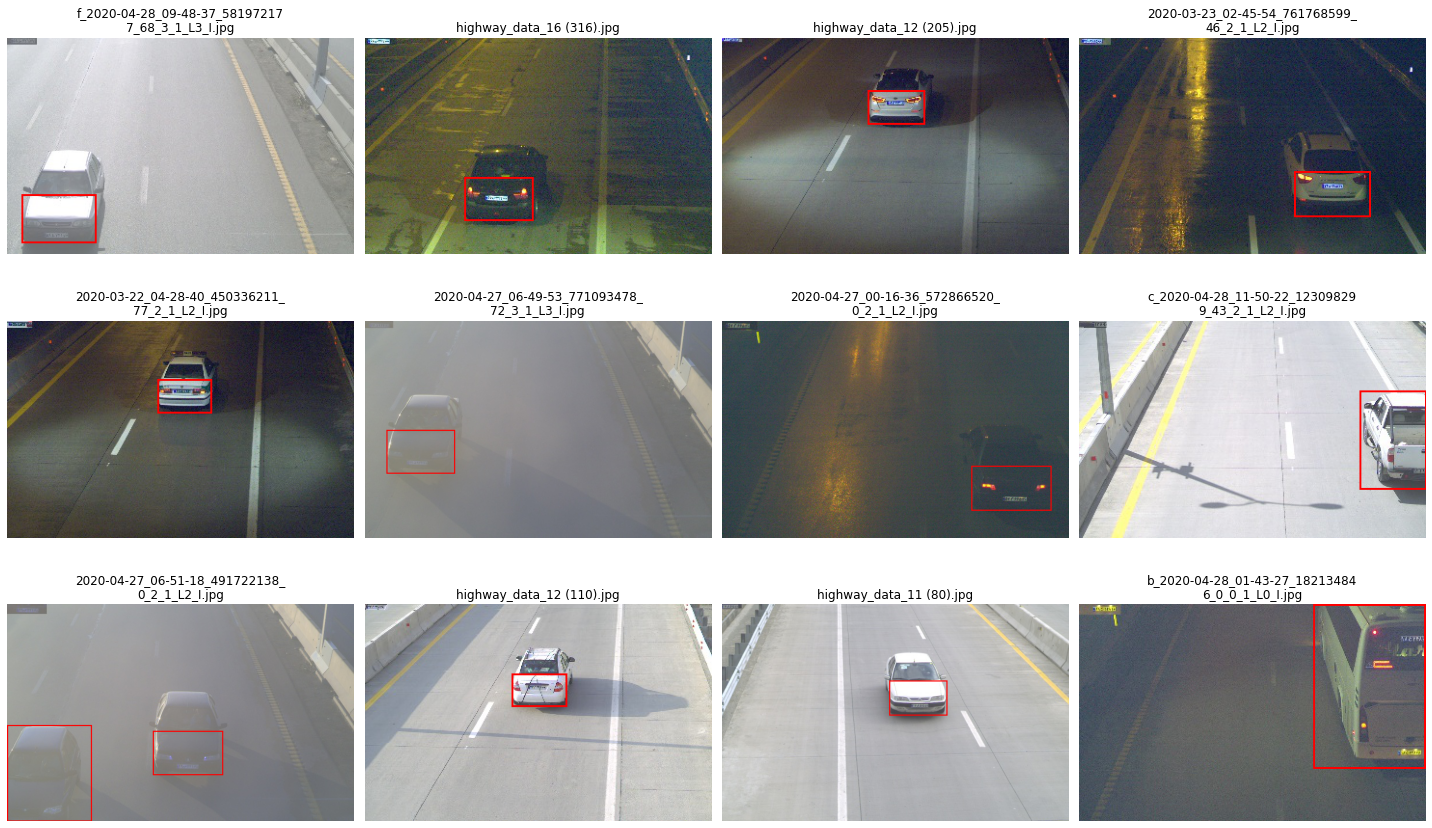

In [ ]:
# Show some random images and check their bboxes
all_images = os.listdir(train_path)
num_to_select = 12
image_ids = random.sample(all_images, num_to_select)
show_images(image_ids)

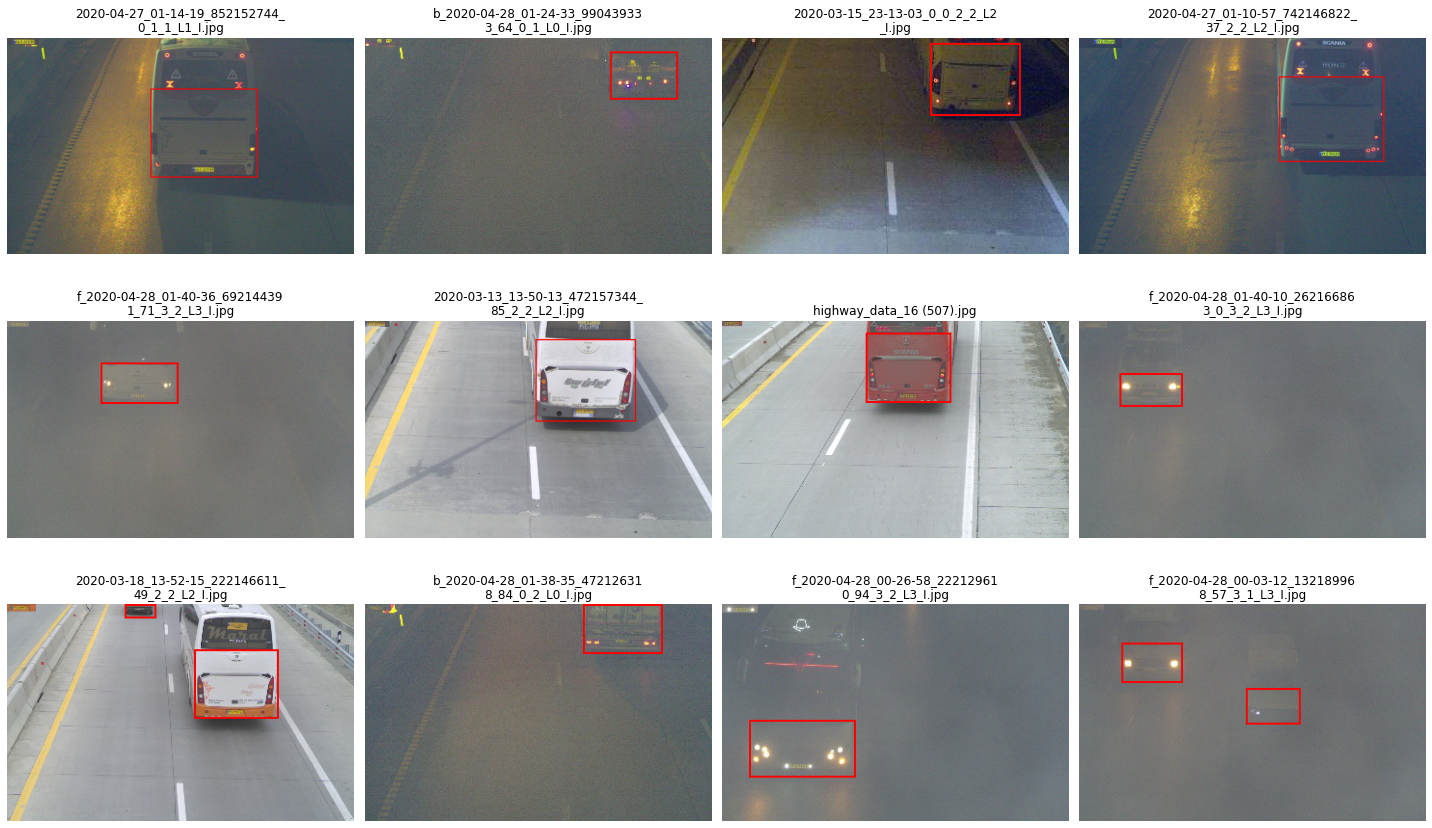

In [ ]:
# Show some of heavy cars
heavy_images = df[df['class'] == 'heavy']['filename'].tolist()
num_to_select = 12
image_ids = random.sample(heavy_images, num_to_select)
show_images(image_ids)

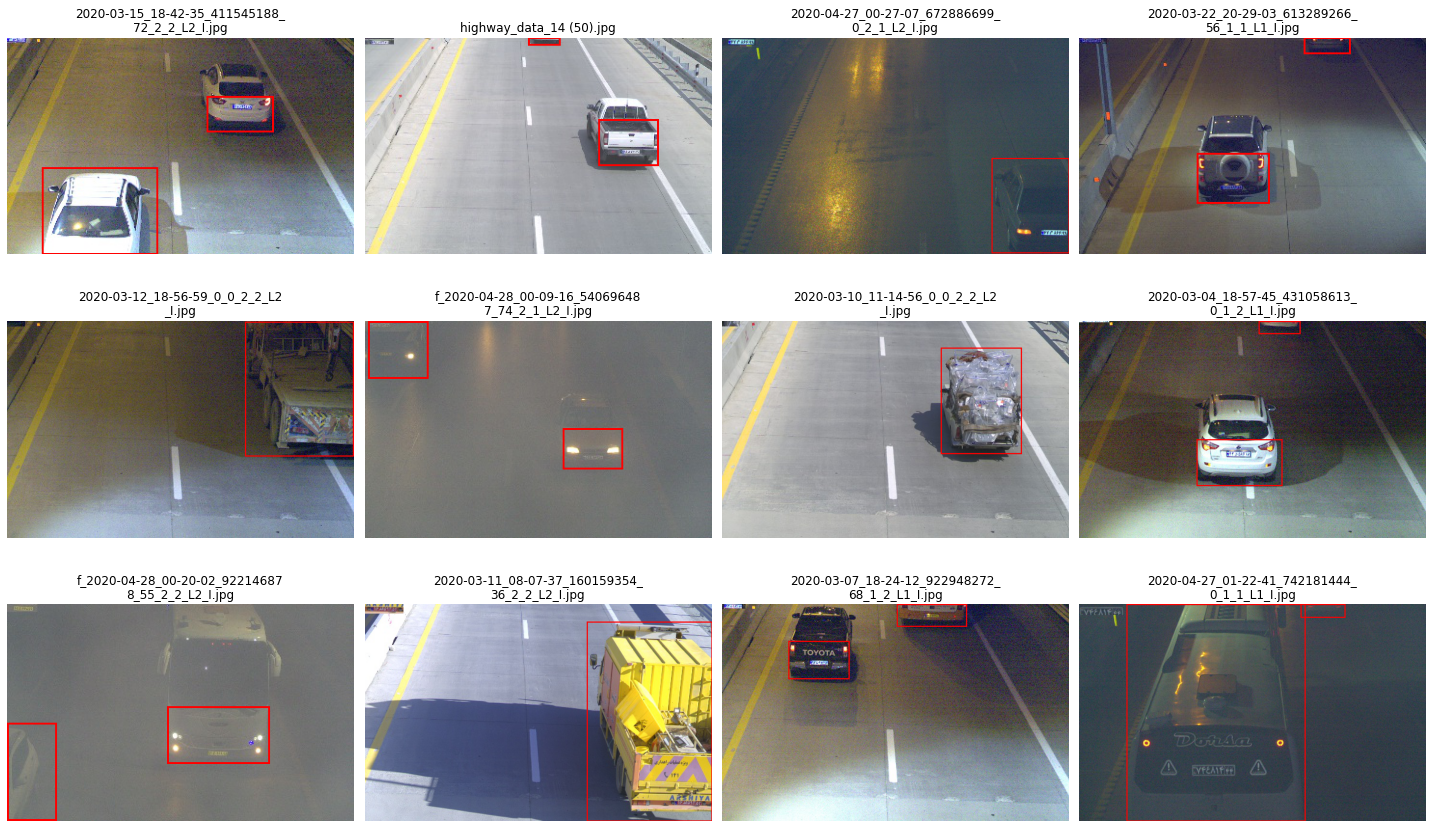

In [ ]:
# Show some of unknown labels
unknown_images = df[df['class'] == 'unknown']['filename'].tolist()
num_to_select = 12
image_ids = random.sample(unknown_images, num_to_select)
show_images(image_ids)

***
## Daytime Recognition

In [ ]:
# Find the average value or brightness of an image
def avg_brightness(image_id):
  image_path = os.path.join(train_path, image_id)
  image = Image.open(image_path)

  # Convert image to HSV
  hsv = cv2.cvtColor(np.float32(image), cv2.COLOR_RGB2HSV)

  # Add up all the pixel values in the V channel
  sum_brightness = np.sum(hsv[:,:,2])
  width, height = image.size
  area = width * height

  # find the avg
  avg = sum_brightness/area

  return avg

In [ ]:
def estimate_daytime(image_id):

  # Extract average brightness feature from an RGB image 
  avg = avg_brightness(image_id)
      
  # Use the avg brightness feature to predict a label 
  low_th, high_th = 90, 140
  if avg > high_th:
    label = 'day'
  elif avg < low_th:
    label = 'night'
  else:
    label = 'unknown'

  return label

In [ ]:
df['daytime'] = ''
df['daytime'] = df['filename'].swifter.apply(estimate_daytime)
df.head()

Streaming output truncated to the last 5000 lines.
highway_data_16 (396).jpg
0
highway_data_16 (397).jpg
0
highway_data_16 (398).jpg
0
highway_data_16 (399).jpg
0
highway_data_16 (4).jpg
0
highway_data_16 (40).jpg
0
highway_data_16 (400).jpg
0
highway_data_16 (401).jpg
0
highway_data_16 (402).jpg
0
highway_data_16 (403).jpg
0
highway_data_16 (404).jpg
0
highway_data_16 (405).jpg
0
highway_data_16 (406).jpg
0
highway_data_16 (407).jpg
0
highway_data_16 (408).jpg
0
highway_data_16 (409).jpg
0
highway_data_16 (41).jpg
0
highway_data_16 (410).jpg
0
highway_data_16 (411).jpg
0
highway_data_16 (412).jpg
0
highway_data_16 (412).jpg
0
highway_data_16 (413).jpg
0
highway_data_16 (414).jpg
0
highway_data_16 (415).jpg
0
highway_data_16 (416).jpg
0
highway_data_16 (417).jpg
0
highway_data_16 (418).jpg
0
highway_data_16 (419).jpg
0
highway_data_16 (42).jpg
0
highway_data_16 (420).jpg
0
highway_data_16 (421).jpg
0
highway_data_16 (422).jpg
0
highway_data_16 (423).jpg
0
highway_data_16 (424).jpg
0
hi

filename  ...  daytime
1240  2020-03-22_20-39-20_482932499_75_2_2_L2_I.jpg  ...    night
1241  2020-03-22_21-21-31_340646810_44_2_2_L2_I.jpg  ...  unknown
1242  2020-03-22_21-26-08_473024611_41_2_2_L2_I.jpg  ...  unknown
1243   2020-03-22_21-42-43_780299611_0_2_2_L2_I.jpg  ...    night
1244  2020-03-22_21-50-21_753269538_52_2_2_L2_I.jpg  ...    night

[5 rows x 10 columns]

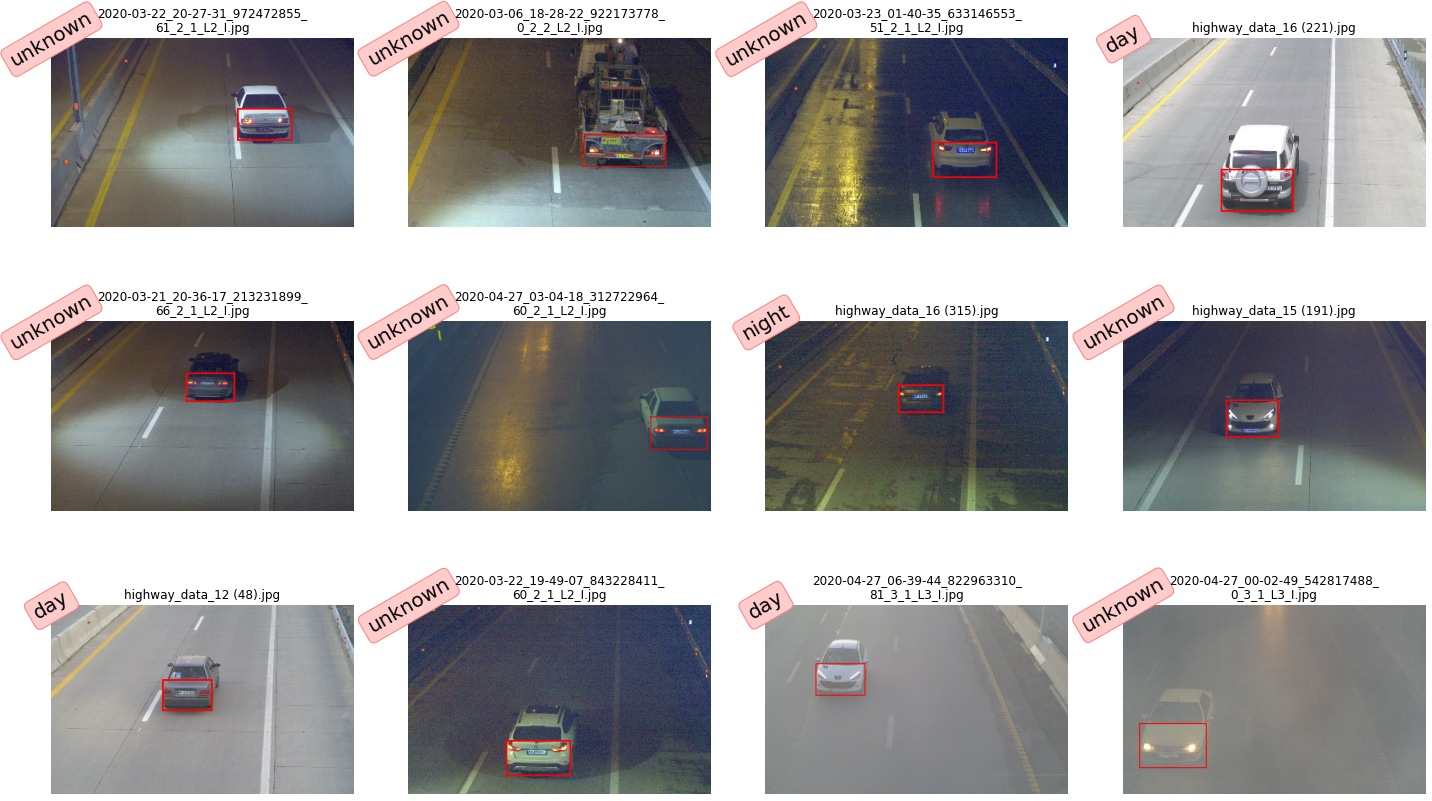

In [ ]:
# Examine some samples with their daytime tags
all_images = os.listdir(train_path)
num_to_select = 12
image_ids = random.sample(all_images, num_to_select)
labels = []
for image_id in image_ids:
  daytime = df[df['filename'] == image_id]['daytime'].tolist()
  labels.append(daytime[0])
show_images(image_ids, text=labels)

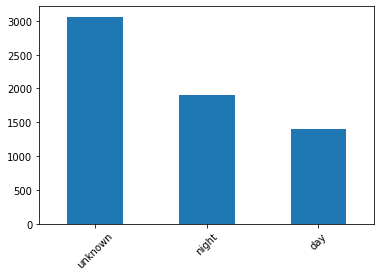

In [ ]:
# Distribution of daytime column
df['daytime'].value_counts().plot(kind='bar', rot=45)

In [ ]:
# Join class and daytime column for validation seperation
df['class-daytime'] = df['class'] + '-' + df['daytime']
df.head()

filename  width  ...  daytime  class-daytime
0  2020-03-22_20-39-20_482932499_75_2_2_L2_I.jpg    360  ...    night    light-night
1  2020-03-22_21-21-31_340646810_44_2_2_L2_I.jpg    360  ...  unknown  light-unknown
2  2020-03-22_21-26-08_473024611_41_2_2_L2_I.jpg    360  ...  unknown  heavy-unknown
3   2020-03-22_21-42-43_780299611_0_2_2_L2_I.jpg    360  ...    night    light-night
4  2020-03-22_21-50-21_753269538_52_2_2_L2_I.jpg    360  ...    night    light-night

[5 rows x 11 columns]

In [ ]:
# Save df to csv file
file_path = root_path + 'labels_formated.csv'
df.to_csv(file_path, index=False)